tensorflow에서는 이미 학습된 모델을 손쉽게 불러올 수 있습니다. 

Resnet, Mobilenet, EfficientNet 등 CNN의 대표적인 모델을 바로 불러올 수 있습니다. 

https://www.tensorflow.org/api_docs/python/tf/keras/applications





In [4]:
# 위의 링크에서 제공하는 모델을 아래와 같이 불러올수 있습니다

import tensorflow as tf
model = tf.keras.applications.MobileNetV2()

14548992/14536120 [==============================] - 0s 0us/step


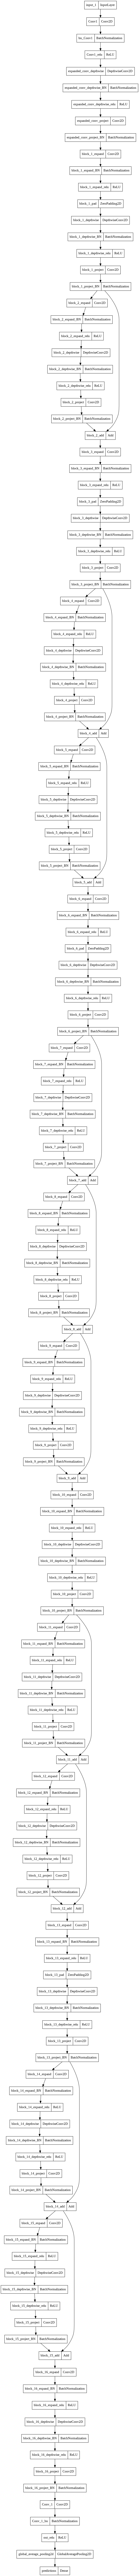

In [5]:
# 모델 구조 살펴보기
tf.keras.utils.plot_model(model)


https://www.tensorflow.org/api_docs/python/tf/keras/applications/mobilenet_v2/MobileNetV2


```
tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=None,
    alpha=1.0,
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax',
    **kwargs
)
```

위에서 불러온 모델은 imagenet으로 학습된 데이터의 웨이트가 로딩되었고, 

분류할 수 있는 Top 부분까지 포함하고 있습니다. 

따라서 바로 prediction이 가능한 모델입니다

imagenet 데이터를 확인해보고, predict해 봅시다

텐서플로에는 대표적인 데이터셋을 쉽게 불러올 수 있습니다.

https://www.tensorflow.org/datasets/catalog/overview

https://www.tensorflow.org/datasets/overview

In [6]:
import tensorflow_datasets as tfds
dataset, info = tfds.load('imagenet_v2',
    split='test', #split['train', 'test']
    with_info=True,
    as_supervised=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imagenet_v2/matched-frequency/1.0.0.incompleteCLZTFY/imagenet_v2-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset imagenet_v2 downloaded and prepared to /root/tensorflow_datasets/imagenet_v2/matched-frequency/1.0.0. Subsequent calls will reuse this data.


In [7]:
!ls '/root/tensorflow_datasets/imagenet_v2/matched-frequency/1.0.0'

dataset_info.json
features.json
imagenet_v2-test.tfrecord-00000-of-00016
imagenet_v2-test.tfrecord-00001-of-00016
imagenet_v2-test.tfrecord-00002-of-00016
imagenet_v2-test.tfrecord-00003-of-00016
imagenet_v2-test.tfrecord-00004-of-00016
imagenet_v2-test.tfrecord-00005-of-00016
imagenet_v2-test.tfrecord-00006-of-00016
imagenet_v2-test.tfrecord-00007-of-00016
imagenet_v2-test.tfrecord-00008-of-00016
imagenet_v2-test.tfrecord-00009-of-00016
imagenet_v2-test.tfrecord-00010-of-00016
imagenet_v2-test.tfrecord-00011-of-00016
imagenet_v2-test.tfrecord-00012-of-00016
imagenet_v2-test.tfrecord-00013-of-00016
imagenet_v2-test.tfrecord-00014-of-00016
imagenet_v2-test.tfrecord-00015-of-00016
label.labels.txt


In [8]:
dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [9]:
info

tfds.core.DatasetInfo(
    name='imagenet_v2',
    version=1.0.0,
    description='ImageNet-v2 is an ImageNet test set (10 per class) collected by closely
following the original labelling protocol. Each image has been labelled by
at least 10 MTurk workers, possibly more, and depending on the strategy used to
select which images to include among the 10 chosen for the given class there are
three different versions of the dataset. Please refer to section four of the
paper for more details on how the different variants were compiled.

The label space is the same as that of ImageNet2012. Each example is
represented as a dictionary with the following keys:

* 'image': The image, a (H, W, 3)-tensor.
* 'label': An integer in the range [0, 1000).
* 'file_name': A unique sting identifying the example within the dataset.',
    homepage='https://github.com/modestyachts/ImageNetV2',
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(None,

In [10]:
info.features['label']

ClassLabel(shape=(), dtype=tf.int64, num_classes=1000)

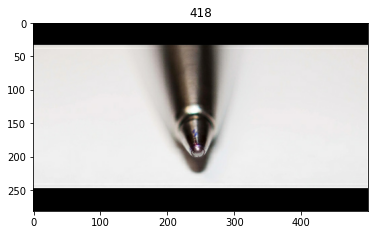

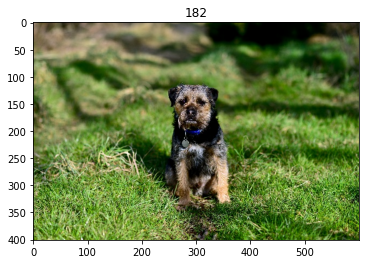

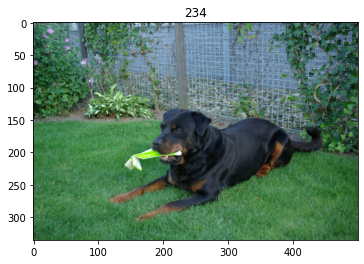

In [11]:
import matplotlib.pyplot as plt

for image, label in dataset.take(3):
  plt.title(label.numpy())
  plt.imshow(image)
  plt.show()

In [12]:
info.features['label'].int2str(418)

'n02783161'

https://github.com/modestyachts/ImageNetV2/blob/master/data/metadata/class_info.json


In [13]:
import pandas as pd
names = pd.read_json('https://raw.githubusercontent.com/modestyachts/ImageNetV2/master/data/metadata/class_info.json')

In [14]:
names

,cid,wnid,synset,gloss
0,0,n01440764,"[tench, Tinca tinca]",freshwater dace-like game fish of Europe and w...
1,1,n01443537,"[goldfish, Carassius auratus]",small golden or orange-red freshwater fishes o...
2,2,n01484850,"[great white shark, white shark, man-eater, ma...",large aggressive shark widespread in warm seas...
3,3,n01491361,"[tiger shark, Galeocerdo cuvieri]",large dangerous warm-water shark with striped ...
4,4,n01494475,"[hammerhead, hammerhead shark]",medium-sized live-bearing shark with eyes at e...
...,...,...,...,...
995,995,n13044778,[earthstar],any fungus of the family Geastraceae; in form ...
996,996,n13052670,"[hen-of-the-woods, hen of the woods, Polyporus...",large greyish-brown edible fungus forming a ma...
997,997,n13054560,[bolete],any fungus of the family Boletaceae
998,998,n13133613,"[ear, spike, capitulum]",fruiting spike of a cereal plant especially corn


In [15]:
names.query('cid==418')

,cid,wnid,synset,gloss
418,418,n02783161,"[ballpoint, ballpoint pen, ballpen, Biro]",a pen that has a small metal ball as the point...


In [16]:
IMG_SIZE = 224

def resize(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))  
  return image, label

In [17]:
tests = dataset.map(resize)

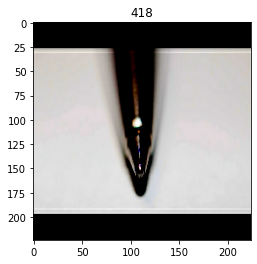

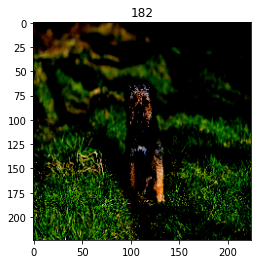

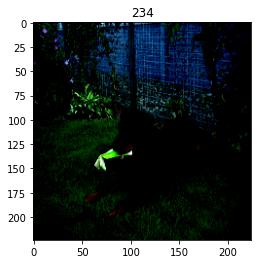

In [18]:
for image, label in tests.take(3):
  plt.imshow(image)
  plt.title(label.numpy())
  plt.show()
  

In [19]:
import numpy as np
t = []
for image, label in tests.take(3):    
  t.append(image)
t = np.array(t)
  

In [20]:
pred_t = model.predict(t)
pred_t.argmax(axis=1)

array([418, 182, 234])

In [21]:
names.query('cid==418 | cid==182 | cid == 234')

,cid,wnid,synset,gloss
182,182,n02093754,[Border terrier],small rough-coated terrier of British origin
234,234,n02106550,[Rottweiler],German breed of large vigorous short-haired ca...
418,418,n02783161,"[ballpoint, ballpoint pen, ballpen, Biro]",a pen that has a small metal ball as the point...


이미지넷 분류 정확도 참고

https://paperswithcode.com/sota/image-classification-on-imagenet